In [15]:
import numpy as np
import csv
import pandas as pd
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import random
from sklearn.metrics import roc_curve, auc

# In[134]:


from sklearn.model_selection import train_test_split
 #首先，读取.CSV文件成矩阵的形式。

In [16]:
383 // 8

47

In [17]:
health_data = np.load('health_data.npy')
health_label = np.load('health_label.npy')
sick_fakedata = np.load('sick_fakedata_35.npy')
sick_fakelabel = np.load('sick_fakelabel.npy')
sick_data = np.load('sick_data.npy')
sick_label = np.load('sick_label.npy')

X_train_sick = np.load('sick_train_Kmeans_2.npy')
X_test_sick = np.load('sick_test_Kmeans_2.npy')
y_train_sick = np.load('sick_train_Kmeans_label_2.npy').tolist()
y_test_sick = np.load('sick_test_Kmeans_label_2.npy').tolist()
X_val_sick = np.load('sick_val_Kmeans_2.npy')
y_val_sick = np.load('sick_val_Kmeans_label_2.npy').tolist()


X_train_health = np.load('health_train_Kmeans_2.npy')
X_test_health = np.load('health_test_Kmeans_2.npy')
y_train_health = np.load('health_train_Kmeans_label_2.npy').tolist()
y_test_health = np.load('health_test_Kmeans_label_2.npy').tolist()
X_val_health = np.load('health_val_Kmeans_2.npy')
y_val_health = np.load('health_val_Kmeans_label_2.npy').tolist()


y_fakesick = []
y_train_sick =[]

for i in sick_fakedata:
    y_fakesick.append(1) 
for i in X_train_sick:
    y_train_sick.append(1) 




In [18]:
print(len(X_train_sick[0]))

382


In [19]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

from collections import Counter

   
smote_enn = SMOTEENN(random_state = 4)


for j in range(95):
    X_train = np.vstack((X_train_sick,X_train_health,sick_fakedata[:100+10*j]))
    X_test = np.vstack((X_test_sick,X_test_health))
    X_val = np.vstack((X_val_sick,X_val_health))


    y_train = np.array(y_train_sick + y_train_health+ y_fakesick[:100+10*j])
    y_test = np.array(y_test_sick + y_test_health)
    y_val = np.array(y_val_sick + y_val_health)
    
    X_train,y_train = smote_enn.fit_resample(X_train,y_train)

    if np.sum(y_train==1)>1000:
        print(j)
        print(sorted(Counter(y_train).items()))
        break

X_train,y_train = smote_enn.fit_resample(X_train,y_train)   
print(sorted(Counter(y_train).items()))


#X_train = np.vstack((X_train,sick_fakedata[:100]))
#print(y_train)
#y_train = np.concatenate((y_train,y_fakesick[:100]))


86
[(0, 95), (1, 1007)]
[(0, 1007), (1, 1000)]


In [20]:

print(len(y_train))

2007


In [21]:
torch_x = torch.from_numpy(X_train)
torch_y = torch.from_numpy(y_train)

test_x = torch.from_numpy(X_test)
test_y = torch.from_numpy(y_test)
test_x_val = torch.from_numpy(X_val)
test_y_val = torch.from_numpy(y_val)

y_train = torch.tensor(torch_y, dtype=torch.long)
y_test = torch.tensor(test_y,dtype = torch.long)
x_test = torch.tensor(test_x , dtype=torch.float32)
x_train = torch.tensor(torch_x, dtype=torch.float32)
x_val = torch.tensor(test_x_val , dtype=torch.float32)
y_val = torch.tensor(test_y_val,  dtype = torch.long)


# In[136]:
torch_x_sick = torch.from_numpy(X_train_sick)
x_train_sick = torch.tensor(torch_x_sick, dtype=torch.float32)
torch_y_sick = torch.from_numpy(np.array(y_train_sick))
y_train_sick = torch.tensor(torch_y_sick, dtype=torch.long)

health_data = torch.from_numpy(X_test_health)
sick_data = torch.from_numpy(X_test_sick)
health_data = torch.tensor(health_data, dtype=torch.float32)
sick_data = torch.tensor(sick_data, dtype=torch.float32)

health_label = torch.from_numpy(np.array(y_test_health))
sick_label = torch.from_numpy(np.array(y_test_sick))
health_label = torch.tensor(health_data, dtype=torch.long)
sick_label = torch.tensor(sick_label, dtype=torch.long)


health_data_val = torch.from_numpy(X_val_health)
sick_data_val = torch.from_numpy(X_val_sick)
health_data_val = torch.tensor(health_data_val, dtype=torch.float32)
sick_data_val = torch.tensor(sick_data_val, dtype=torch.float32)

health_label_val = torch.from_numpy(np.array(y_val_health))
sick_label_val = torch.from_numpy(np.array(y_val_sick))
health_label_val = torch.tensor(health_data_val, dtype=torch.long)
sick_label_val = torch.tensor(sick_label_val, dtype=torch.long)

'''
en_data = torch.from_numpy(en_data)
en_data = torch.tensor(en_data, dtype=torch.float32)
en_label = torch.from_numpy(np.array(en_label))
en_label = torch.tensor(en_label, dtype=torch.long)
'''


d:\softwares\python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':
d:\softwares\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # Remove the CWD from sys.path while we load stuff.
d:\softwares\python37\lib\site-packages\ipykernel_launcher.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  # This is added back by InteractiveShellApp.init_path()
d:\softwares\python37\lib\site-packages\ipykernel_launcher.py:12: UserWarn

'\nen_data = torch.from_numpy(en_data)\nen_data = torch.tensor(en_data, dtype=torch.float32)\nen_label = torch.from_numpy(np.array(en_label))\nen_label = torch.tensor(en_label, dtype=torch.long)\n'

In [22]:
#print(en_data)

In [23]:
#Hyper parameters
EPOCH = 200
BATCH_SIZE = 64
TIME_STEP = 1
INPUT_SIZE = 382
LR = 0.00005

In [24]:

x_test = x_test.reshape(x_test.shape[0], TIME_STEP, INPUT_SIZE)
x_val = x_val.reshape(x_val.shape[0], TIME_STEP, INPUT_SIZE)
x_train = x_train.reshape(x_train.shape[0], TIME_STEP, INPUT_SIZE)
x_train_sick = x_train_sick.reshape(x_train_sick.shape[0], TIME_STEP, INPUT_SIZE)



health_data = health_data.reshape(health_data.shape[0], TIME_STEP, INPUT_SIZE)
sick_data = sick_data.reshape(sick_data.shape[0], TIME_STEP, INPUT_SIZE)
health_data_val = health_data_val.reshape(health_data_val.shape[0], TIME_STEP, INPUT_SIZE)
sick_data_val = sick_data_val.reshape(sick_data_val.shape[0], TIME_STEP, INPUT_SIZE)
#print(x_train.shape,x_test.shape)

torch_dataset = Data.TensorDataset(x_train,y_train )
train_loader = Data.DataLoader(dataset= torch_dataset, batch_size=BATCH_SIZE, shuffle=True,num_workers=0)
#print(x_train,x_test)


In [25]:

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv1d(
                in_channels=1,              # input height
                out_channels=64,            # n_filters
                kernel_size=2,              # filter size
                stride=1,                   # filter movement/step
                                            # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            #nn.Dropout(0.2),
            #nn.BatchNorm1d(64),
            nn.ReLU(),                      # activation
            nn.MaxPool1d(kernel_size=3),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv1d(64, 8, 2, 1),     # output shape (32, 14, 14)
            #nn.Dropout(0.2),
            #nn.BatchNorm1d(8),
            nn.ReLU(),                      # activation
            nn.MaxPool1d(3),                # output shape (32, 7, 7)
        )

        self.out = nn.Linear(336, 2)# fully connected layer, output 10 classes

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        
        
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # return x for visualization



In [26]:

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc  = nn.Sequential(                      # Discriminator
            nn.Linear(382, 383//2),     # receive art work either from the famous artist or a newbie like G
            nn.ReLU(True),
            nn.Linear(383//2,383//4),
            nn.ReLU(True),
            nn.Linear(383//4,383//8),


            #nn.Sigmoid(),  # tell the probability that the art work is made by artist
        )
        self.out = nn.Linear(383//8, 2)# fully connected layer, output 10 classes

    def forward(self, x):
        x = self.fc(x)
        x = x.view(x.size(0), -1)           # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out(x)
        return output, x    # r


In [27]:

class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.LSTM(         # if use nn.RNN(), it hardly learns
            input_size=INPUT_SIZE,
            hidden_size=64,         # rnn hidden unit
            num_layers=3,
            #dropout = 0.5,
            # number of rnn layer
            batch_first=True,       # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )

        self.out = nn.Linear(64,2)
        #self.sigmoid = nn.Sigmoid()
        
        
    def forward(self, x):
        # x shape (batch, time_step, input_size)
        # r_out shape (batch, time_step, output_size)
        # h_n shape (n_layers, batch, hidden_size)
        # h_c shape (n_layers, batch, hidden_size)
        r_out, (h_n, h_c) = self.rnn(x, None)   # None represents zero initial hidden state

        # choose r_out at the last time step
        out = self.out(r_out[:, -1, :])
        #out = self.sigmoid(outputs)
        return out,r_out


In [28]:

rnn =  DNN()
print(rnn)
optimizer = torch.optim.Adam(rnn.parameters(), lr = LR)
loss_func = torch.nn.BCELoss()



DNN(
  (fc): Sequential(
    (0): Linear(in_features=382, out_features=191, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=191, out_features=95, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=95, out_features=47, bias=True)
  )
  (out): Linear(in_features=47, out_features=2, bias=True)
)


In [29]:
predict_list = []
val_list=[]
for i in range(0,10):
    #rnn =  DNN()
    rnn =  DNN()
#print(rnn)
    optimizer = torch.optim.Adam(rnn.parameters(), lr = LR)
    loss_func = torch.nn.CrossEntropyLoss()
    
    Loss_CNN = []
    Acc_train = []
    Acc_test = []
    Acc_val = []
    
    Acc_sick = []
    Acc_health = []
    Times = []
    times = 0
    STEP = []
    
    best_acc = 0
    best_sick = 0
    best_health = 0
    
    best_final_acc = 0
    best__final_sick = 0
    best_final_health = 0
    
    for epoch in range(EPOCH):
        for step, (x, y) in enumerate(train_loader):   # gives batch data, normalize x when iterate train_loader
            b_x = Variable(x)#.view(-1,TIME_STEP,INPUT_SIZE))   # batch x
            b_y = Variable(y)   # batch y
            
            output = rnn(b_x)[0]
            #print(output)
            #print(b_y)
            output_sick = rnn(x_train_sick)[0]
           # output_en = rnn(en_data)[0]
           
            loss = loss_func(output, b_y)+0.59*0.99*((b_y == 1).sum()/len(y_train))*loss_func(output_sick,y_train_sick)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            
            
            if step % 50 == 0:
                STEP.append(epoch)
                train_output, last_layer = rnn(x_train)
                #pred_y = torch.max(train_output, 1)[1].data.squeeze()
                pred_y = torch.max(train_output, 1)[1].data.squeeze()
                train_accuracy = (pred_y == y_train).sum().item() / float(y_train.size(0))
                
                #test_output, last_layer = rnn(x_test)                   # (samples, time_step, input_size)
                #pred_y = torch.max(test_output, 1)[1].data.squeeze()
                #test_accuracy = (pred_y == y_test).sum().item() / float(y_test.size(0))
                
                #test_output_2, last_layer = rnn(x_test_2)                   # (samples, time_step, input_size)
                #pred_y_2 = torch.max(test_output_2, 1)[1].data.squeeze()
                #test_accuracy_2 = (pred_y_2 == y_test_2).sum().item() / float(y_test.size(0))
                
                
                sick_data_valout, last_layer = rnn(sick_data_val)
                pred_sick_val = torch.max(sick_data_valout, 1)[1].data.squeeze()
                pred_sick_val = (pred_sick_val.tolist().count(1))/float(sick_data_val.size(0))
                
                health_data_valout, last_layer = rnn(health_data_val)
                pred_health_val = torch.max(health_data_valout, 1)[1].data.squeeze()
                pred_health_val = (pred_health_val.tolist().count(0))/float(health_data_val.size(0))
                
                sick_data_out, last_layer = rnn(sick_data)
                pred_sick = torch.max(sick_data_out, 1)[1].data.squeeze()
                pred_sick = (pred_sick.tolist().count(1))/float(sick_data.size(0))
                
                health_data_out, last_layer = rnn(health_data)
                pred_health = torch.max(health_data_out, 1)[1].data.squeeze()
                pred_health = (pred_health.tolist().count(0))/float(health_data.size(0))
                
                test_acc =  (pred_sick_val + pred_health_val)/2
                final_acc = (pred_sick + pred_health)/2
                
                Acc_train.append(train_accuracy)
                Acc_test.append(test_acc)
                Acc_val.append(final_acc)
                
                Acc_sick.append(pred_sick_val)
                Acc_health.append(pred_health_val)
                Loss_CNN.append(loss.data)
                times += 1
                Times.append(times)
                
                
                print('Epoch: ', epoch, '| train loss: %.4f' % loss.data,'| train accuracy: %.2f' % test_acc,'| predict Incident val: %.2f' % pred_sick_val,'| predict Nonincident val: %.2f' % pred_health_val)
                print('Epoch: ', epoch, '| train loss: %.4f' % loss.data,'| train accuracy@@@: %.2f' % final_acc,'| predict Incident : %.2f' % pred_sick,'| predict Nonincident : %.2f' % pred_health)
                
                if  min(pred_sick_val,pred_health_val)>= 0.6 and test_acc>best_acc:
                    
                    best_acc  = test_acc
                    best_sick = pred_sick_val
                    best_health = pred_health_val
                    
                    best_final_acc  = final_acc
                    best_final_sick = pred_sick
                    best_final_health = pred_health
                    
                    torch.save(rnn,'dnnL_11_best_{}'.format(i)+'.pkl')
                    #np.save('pred_y_dnnL_best_{}'.format(i)+'.npy',pred_y)
                    #np.save('pred_sick_dnnL_best_11.npy',Acc_predict)
                    #np.save('pred_health_dnnL_best_11.npy',Acc_health)
                    #np.save('Loss_dnnL_best_11.npy',Loss_CNN)
                    #np.save('STEP_dnnL_best_11.npy',STEP)
                    #np.save('Times_dnnL_best_11.npy',Times)
                    #np.save('Acc_testreal_dnnL_best_11.npy',test_acc)
                    
    if best_acc == 0:
        best_acc  = test_acc
        best_sick = pred_sick_val
        best_health = pred_health_val
                    
        best_final_acc  = final_acc
        best_final_sick = pred_sick
        best_final_health = pred_health
        torch.save(rnn,'dnnL_11_best_{}'.format(i)+'.pkl')
        
    np.save('Acc_train_11_best_{}'.format(i)+'.npy',Acc_train)
    np.save('Acc_test_11_best_{}'.format(i)+'.npy',Acc_test)
    np.save('Acc_val_11_best_{}'.format(i)+'.npy',Acc_val)
    
    np.save('Acc_testave_11_final_{}'.format(i)+'.npy',test_acc)
    np.save('Acc_valave_11_final_{}'.format(i)+'.npy',final_acc)
    np.save('Acc_test_11_hf_{}'.format(i)+'.npy', pred_health)
    np.save('Acc_test_11_sf_{}'.format(i)+'.npy', pred_sick)
    np.save('Acc_val_11_hf_{}'.format(i)+'.npy',pred_health_val)
    np.save('Acc_val_11_sf_{}'.format(i)+'.npy',pred_sick_val)
    
    np.save('pred_health_11_dnnL_end_{}'.format(i)+'.npy',Acc_health)
    np.save('Acc_train_11_dnnL_end_{}'.format(i)+'.npy',Acc_train)
    np.save('Loss_11_dnnL_end_{}'.format(i)+'.npy',Loss_CNN)
    np.save('STEP_11_dnnL_end_{}'.format(i)+'.npy',STEP) 
    np.save('Times_11_dnnL_end_{}'.format(i)+'.npy',Times)
    val_list.append(best_acc)
    print('best_acc:',best_acc,'best_sick:',best_sick,'best_health:',best_health)
    print('best_acc:',best_final_acc,'best_sick:',best_final_sick,'best_health:',best_final_health)
    

Epoch:  0 | train loss: 0.7026 | train accuracy: 0.50 | predict Incident val: 1.00 | predict Nonincident val: 0.00
Epoch:  0 | train loss: 0.7026 | train accuracy@@@: 0.50 | predict Incident : 1.00 | predict Nonincident : 0.00
Epoch:  1 | train loss: 0.6926 | train accuracy: 0.68 | predict Incident val: 0.86 | predict Nonincident val: 0.50
Epoch:  1 | train loss: 0.6926 | train accuracy@@@: 0.59 | predict Incident : 0.62 | predict Nonincident : 0.55
Epoch:  2 | train loss: 0.6832 | train accuracy: 0.59 | predict Incident val: 0.36 | predict Nonincident val: 0.83
Epoch:  2 | train loss: 0.6832 | train accuracy@@@: 0.62 | predict Incident : 0.44 | predict Nonincident : 0.81
Epoch:  3 | train loss: 0.6717 | train accuracy: 0.59 | predict Incident val: 0.43 | predict Nonincident val: 0.76
Epoch:  3 | train loss: 0.6717 | train accuracy@@@: 0.62 | predict Incident : 0.50 | predict Nonincident : 0.74
Epoch:  4 | train loss: 0.6426 | train accuracy: 0.54 | predict Incident val: 0.43 | predict

Epoch:  36 | train loss: 0.0182 | train accuracy: 0.61 | predict Incident val: 0.71 | predict Nonincident val: 0.50
Epoch:  36 | train loss: 0.0182 | train accuracy@@@: 0.58 | predict Incident : 0.62 | predict Nonincident : 0.54
Epoch:  37 | train loss: 0.0203 | train accuracy: 0.57 | predict Incident val: 0.57 | predict Nonincident val: 0.57
Epoch:  37 | train loss: 0.0203 | train accuracy@@@: 0.61 | predict Incident : 0.62 | predict Nonincident : 0.59
Epoch:  38 | train loss: 0.0218 | train accuracy: 0.61 | predict Incident val: 0.71 | predict Nonincident val: 0.50
Epoch:  38 | train loss: 0.0218 | train accuracy@@@: 0.59 | predict Incident : 0.62 | predict Nonincident : 0.55
Epoch:  39 | train loss: 0.0515 | train accuracy: 0.61 | predict Incident val: 0.71 | predict Nonincident val: 0.51
Epoch:  39 | train loss: 0.0515 | train accuracy@@@: 0.59 | predict Incident : 0.62 | predict Nonincident : 0.56
Epoch:  40 | train loss: 0.0385 | train accuracy: 0.64 | predict Incident val: 0.79 

Epoch:  72 | train loss: 0.0055 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  72 | train loss: 0.0055 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.50
Epoch:  73 | train loss: 0.0040 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.51
Epoch:  73 | train loss: 0.0040 | train accuracy@@@: 0.61 | predict Incident : 0.69 | predict Nonincident : 0.53
Epoch:  74 | train loss: 0.0043 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  74 | train loss: 0.0043 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  75 | train loss: 0.0054 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.51
Epoch:  75 | train loss: 0.0054 | train accuracy@@@: 0.60 | predict Incident : 0.69 | predict Nonincident : 0.51
Epoch:  76 | train loss: 0.0040 | train accuracy: 0.64 | predict Incident val: 0.79 

Epoch:  108 | train loss: 0.0016 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  108 | train loss: 0.0016 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.48
Epoch:  109 | train loss: 0.0016 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  109 | train loss: 0.0016 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.50
Epoch:  110 | train loss: 0.0012 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  110 | train loss: 0.0012 | train accuracy@@@: 0.60 | predict Incident : 0.69 | predict Nonincident : 0.51
Epoch:  111 | train loss: 0.0019 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  111 | train loss: 0.0019 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  112 | train loss: 0.0017 | train accuracy: 0.64 | predict Incident v

Epoch:  144 | train loss: 0.0003 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  144 | train loss: 0.0003 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  145 | train loss: 0.0003 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  145 | train loss: 0.0003 | train accuracy@@@: 0.58 | predict Incident : 0.69 | predict Nonincident : 0.48
Epoch:  146 | train loss: 0.0002 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  146 | train loss: 0.0002 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  147 | train loss: 0.0002 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  147 | train loss: 0.0002 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  148 | train loss: 0.0003 | train accuracy: 0.64 | predict Incident v

Epoch:  180 | train loss: 0.0000 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  180 | train loss: 0.0000 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  181 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  181 | train loss: 0.0001 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  182 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  182 | train loss: 0.0001 | train accuracy@@@: 0.62 | predict Incident : 0.75 | predict Nonincident : 0.48
Epoch:  183 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  183 | train loss: 0.0001 | train accuracy@@@: 0.62 | predict Incident : 0.75 | predict Nonincident : 0.48
Epoch:  184 | train loss: 0.0001 | train accuracy: 0.63 | predict Incident v

Epoch:  15 | train loss: 0.1483 | train accuracy: 0.54 | predict Incident val: 0.50 | predict Nonincident val: 0.58
Epoch:  15 | train loss: 0.1483 | train accuracy@@@: 0.61 | predict Incident : 0.62 | predict Nonincident : 0.60
Epoch:  16 | train loss: 0.1274 | train accuracy: 0.54 | predict Incident val: 0.57 | predict Nonincident val: 0.51
Epoch:  16 | train loss: 0.1274 | train accuracy@@@: 0.58 | predict Incident : 0.62 | predict Nonincident : 0.54
Epoch:  17 | train loss: 0.1130 | train accuracy: 0.54 | predict Incident val: 0.57 | predict Nonincident val: 0.52
Epoch:  17 | train loss: 0.1130 | train accuracy@@@: 0.59 | predict Incident : 0.62 | predict Nonincident : 0.55
Epoch:  18 | train loss: 0.0860 | train accuracy: 0.54 | predict Incident val: 0.57 | predict Nonincident val: 0.52
Epoch:  18 | train loss: 0.0860 | train accuracy@@@: 0.59 | predict Incident : 0.62 | predict Nonincident : 0.55
Epoch:  19 | train loss: 0.0748 | train accuracy: 0.53 | predict Incident val: 0.57 

Epoch:  51 | train loss: 0.0073 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.51
Epoch:  51 | train loss: 0.0073 | train accuracy@@@: 0.61 | predict Incident : 0.69 | predict Nonincident : 0.52
Epoch:  52 | train loss: 0.0071 | train accuracy: 0.62 | predict Incident val: 0.71 | predict Nonincident val: 0.53
Epoch:  52 | train loss: 0.0071 | train accuracy@@@: 0.60 | predict Incident : 0.62 | predict Nonincident : 0.58
Epoch:  53 | train loss: 0.0069 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.52
Epoch:  53 | train loss: 0.0069 | train accuracy@@@: 0.58 | predict Incident : 0.62 | predict Nonincident : 0.54
Epoch:  54 | train loss: 0.0060 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.52
Epoch:  54 | train loss: 0.0060 | train accuracy@@@: 0.58 | predict Incident : 0.62 | predict Nonincident : 0.54
Epoch:  55 | train loss: 0.0062 | train accuracy: 0.65 | predict Incident val: 0.79 

Epoch:  87 | train loss: 0.0022 | train accuracy: 0.66 | predict Incident val: 0.79 | predict Nonincident val: 0.52
Epoch:  87 | train loss: 0.0022 | train accuracy@@@: 0.62 | predict Incident : 0.69 | predict Nonincident : 0.55
Epoch:  88 | train loss: 0.0020 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  88 | train loss: 0.0020 | train accuracy@@@: 0.60 | predict Incident : 0.69 | predict Nonincident : 0.51
Epoch:  89 | train loss: 0.0025 | train accuracy: 0.66 | predict Incident val: 0.79 | predict Nonincident val: 0.52
Epoch:  89 | train loss: 0.0025 | train accuracy@@@: 0.62 | predict Incident : 0.69 | predict Nonincident : 0.55
Epoch:  90 | train loss: 0.0026 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.52
Epoch:  90 | train loss: 0.0026 | train accuracy@@@: 0.61 | predict Incident : 0.69 | predict Nonincident : 0.53
Epoch:  91 | train loss: 0.0019 | train accuracy: 0.65 | predict Incident val: 0.79 

Epoch:  123 | train loss: 0.0006 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.51
Epoch:  123 | train loss: 0.0006 | train accuracy@@@: 0.60 | predict Incident : 0.69 | predict Nonincident : 0.51
Epoch:  124 | train loss: 0.0004 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.51
Epoch:  124 | train loss: 0.0004 | train accuracy@@@: 0.60 | predict Incident : 0.69 | predict Nonincident : 0.51
Epoch:  125 | train loss: 0.0006 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.51
Epoch:  125 | train loss: 0.0006 | train accuracy@@@: 0.61 | predict Incident : 0.69 | predict Nonincident : 0.53
Epoch:  126 | train loss: 0.0003 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  126 | train loss: 0.0003 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.50
Epoch:  127 | train loss: 0.0004 | train accuracy: 0.64 | predict Incident v

Epoch:  159 | train loss: 0.0001 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.52
Epoch:  159 | train loss: 0.0001 | train accuracy@@@: 0.61 | predict Incident : 0.69 | predict Nonincident : 0.52
Epoch:  160 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  160 | train loss: 0.0001 | train accuracy@@@: 0.60 | predict Incident : 0.69 | predict Nonincident : 0.52
Epoch:  161 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  161 | train loss: 0.0001 | train accuracy@@@: 0.61 | predict Incident : 0.69 | predict Nonincident : 0.52
Epoch:  162 | train loss: 0.0002 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.52
Epoch:  162 | train loss: 0.0002 | train accuracy@@@: 0.61 | predict Incident : 0.69 | predict Nonincident : 0.52
Epoch:  163 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident v

Epoch:  195 | train loss: 0.0001 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.52
Epoch:  195 | train loss: 0.0001 | train accuracy@@@: 0.61 | predict Incident : 0.69 | predict Nonincident : 0.53
Epoch:  196 | train loss: 0.0001 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.52
Epoch:  196 | train loss: 0.0001 | train accuracy@@@: 0.61 | predict Incident : 0.69 | predict Nonincident : 0.53
Epoch:  197 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  197 | train loss: 0.0001 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.48
Epoch:  198 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  198 | train loss: 0.0001 | train accuracy@@@: 0.60 | predict Incident : 0.69 | predict Nonincident : 0.52
Epoch:  199 | train loss: 0.0000 | train accuracy: 0.64 | predict Incident v

Epoch:  31 | train loss: 0.0254 | train accuracy: 0.55 | predict Incident val: 0.57 | predict Nonincident val: 0.52
Epoch:  31 | train loss: 0.0254 | train accuracy@@@: 0.63 | predict Incident : 0.69 | predict Nonincident : 0.56
Epoch:  32 | train loss: 0.0379 | train accuracy: 0.55 | predict Incident val: 0.57 | predict Nonincident val: 0.53
Epoch:  32 | train loss: 0.0379 | train accuracy@@@: 0.63 | predict Incident : 0.69 | predict Nonincident : 0.57
Epoch:  33 | train loss: 0.0182 | train accuracy: 0.55 | predict Incident val: 0.57 | predict Nonincident val: 0.53
Epoch:  33 | train loss: 0.0182 | train accuracy@@@: 0.63 | predict Incident : 0.69 | predict Nonincident : 0.57
Epoch:  34 | train loss: 0.0157 | train accuracy: 0.56 | predict Incident val: 0.57 | predict Nonincident val: 0.55
Epoch:  34 | train loss: 0.0157 | train accuracy@@@: 0.64 | predict Incident : 0.69 | predict Nonincident : 0.58
Epoch:  35 | train loss: 0.0206 | train accuracy: 0.55 | predict Incident val: 0.57 

Epoch:  67 | train loss: 0.0032 | train accuracy: 0.58 | predict Incident val: 0.64 | predict Nonincident val: 0.52
Epoch:  67 | train loss: 0.0032 | train accuracy@@@: 0.64 | predict Incident : 0.75 | predict Nonincident : 0.52
Epoch:  68 | train loss: 0.0045 | train accuracy: 0.58 | predict Incident val: 0.64 | predict Nonincident val: 0.52
Epoch:  68 | train loss: 0.0045 | train accuracy@@@: 0.64 | predict Incident : 0.75 | predict Nonincident : 0.53
Epoch:  69 | train loss: 0.0040 | train accuracy: 0.61 | predict Incident val: 0.71 | predict Nonincident val: 0.50
Epoch:  69 | train loss: 0.0040 | train accuracy@@@: 0.63 | predict Incident : 0.75 | predict Nonincident : 0.51
Epoch:  70 | train loss: 0.0050 | train accuracy: 0.61 | predict Incident val: 0.71 | predict Nonincident val: 0.50
Epoch:  70 | train loss: 0.0050 | train accuracy@@@: 0.63 | predict Incident : 0.75 | predict Nonincident : 0.52
Epoch:  71 | train loss: 0.0054 | train accuracy: 0.61 | predict Incident val: 0.71 

Epoch:  103 | train loss: 0.0021 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  103 | train loss: 0.0021 | train accuracy@@@: 0.62 | predict Incident : 0.75 | predict Nonincident : 0.49
Epoch:  104 | train loss: 0.0014 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  104 | train loss: 0.0014 | train accuracy@@@: 0.61 | predict Incident : 0.75 | predict Nonincident : 0.47
Epoch:  105 | train loss: 0.0018 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.51
Epoch:  105 | train loss: 0.0018 | train accuracy@@@: 0.63 | predict Incident : 0.75 | predict Nonincident : 0.52
Epoch:  106 | train loss: 0.0015 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.47
Epoch:  106 | train loss: 0.0015 | train accuracy@@@: 0.61 | predict Incident : 0.75 | predict Nonincident : 0.46
Epoch:  107 | train loss: 0.0014 | train accuracy: 0.63 | predict Incident v

Epoch:  139 | train loss: 0.0003 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  139 | train loss: 0.0003 | train accuracy@@@: 0.62 | predict Incident : 0.75 | predict Nonincident : 0.49
Epoch:  140 | train loss: 0.0002 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  140 | train loss: 0.0002 | train accuracy@@@: 0.62 | predict Incident : 0.75 | predict Nonincident : 0.49
Epoch:  141 | train loss: 0.0003 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  141 | train loss: 0.0003 | train accuracy@@@: 0.63 | predict Incident : 0.75 | predict Nonincident : 0.51
Epoch:  142 | train loss: 0.0003 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  142 | train loss: 0.0003 | train accuracy@@@: 0.63 | predict Incident : 0.75 | predict Nonincident : 0.51
Epoch:  143 | train loss: 0.0002 | train accuracy: 0.63 | predict Incident v

Epoch:  175 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  175 | train loss: 0.0001 | train accuracy@@@: 0.66 | predict Incident : 0.81 | predict Nonincident : 0.50
Epoch:  176 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  176 | train loss: 0.0001 | train accuracy@@@: 0.66 | predict Incident : 0.81 | predict Nonincident : 0.50
Epoch:  177 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  177 | train loss: 0.0001 | train accuracy@@@: 0.66 | predict Incident : 0.81 | predict Nonincident : 0.50
Epoch:  178 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  178 | train loss: 0.0001 | train accuracy@@@: 0.63 | predict Incident : 0.75 | predict Nonincident : 0.51
Epoch:  179 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident v

Epoch:  10 | train loss: 0.2603 | train accuracy: 0.58 | predict Incident val: 0.71 | predict Nonincident val: 0.44
Epoch:  10 | train loss: 0.2603 | train accuracy@@@: 0.60 | predict Incident : 0.75 | predict Nonincident : 0.45
Epoch:  11 | train loss: 0.2493 | train accuracy: 0.55 | predict Incident val: 0.64 | predict Nonincident val: 0.46
Epoch:  11 | train loss: 0.2493 | train accuracy@@@: 0.61 | predict Incident : 0.75 | predict Nonincident : 0.47
Epoch:  12 | train loss: 0.2428 | train accuracy: 0.51 | predict Incident val: 0.50 | predict Nonincident val: 0.52
Epoch:  12 | train loss: 0.2428 | train accuracy@@@: 0.61 | predict Incident : 0.69 | predict Nonincident : 0.54
Epoch:  13 | train loss: 0.1457 | train accuracy: 0.51 | predict Incident val: 0.50 | predict Nonincident val: 0.52
Epoch:  13 | train loss: 0.1457 | train accuracy@@@: 0.63 | predict Incident : 0.75 | predict Nonincident : 0.52
Epoch:  14 | train loss: 0.1363 | train accuracy: 0.52 | predict Incident val: 0.50 

Epoch:  46 | train loss: 0.0174 | train accuracy: 0.57 | predict Incident val: 0.64 | predict Nonincident val: 0.50
Epoch:  46 | train loss: 0.0174 | train accuracy@@@: 0.60 | predict Incident : 0.69 | predict Nonincident : 0.51
Epoch:  47 | train loss: 0.0136 | train accuracy: 0.59 | predict Incident val: 0.64 | predict Nonincident val: 0.53
Epoch:  47 | train loss: 0.0136 | train accuracy@@@: 0.59 | predict Incident : 0.62 | predict Nonincident : 0.55
Epoch:  48 | train loss: 0.0115 | train accuracy: 0.58 | predict Incident val: 0.64 | predict Nonincident val: 0.51
Epoch:  48 | train loss: 0.0115 | train accuracy@@@: 0.58 | predict Incident : 0.62 | predict Nonincident : 0.53
Epoch:  49 | train loss: 0.0093 | train accuracy: 0.57 | predict Incident val: 0.64 | predict Nonincident val: 0.51
Epoch:  49 | train loss: 0.0093 | train accuracy@@@: 0.60 | predict Incident : 0.69 | predict Nonincident : 0.51
Epoch:  50 | train loss: 0.0099 | train accuracy: 0.58 | predict Incident val: 0.64 

Epoch:  82 | train loss: 0.0023 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  82 | train loss: 0.0023 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  83 | train loss: 0.0033 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  83 | train loss: 0.0033 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  84 | train loss: 0.0041 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  84 | train loss: 0.0041 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  85 | train loss: 0.0037 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.51
Epoch:  85 | train loss: 0.0037 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  86 | train loss: 0.0030 | train accuracy: 0.64 | predict Incident val: 0.79 

Epoch:  118 | train loss: 0.0014 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  118 | train loss: 0.0014 | train accuracy@@@: 0.58 | predict Incident : 0.69 | predict Nonincident : 0.47
Epoch:  119 | train loss: 0.0008 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  119 | train loss: 0.0008 | train accuracy@@@: 0.58 | predict Incident : 0.69 | predict Nonincident : 0.47
Epoch:  120 | train loss: 0.0010 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  120 | train loss: 0.0010 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  121 | train loss: 0.0008 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  121 | train loss: 0.0008 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.48
Epoch:  122 | train loss: 0.0010 | train accuracy: 0.64 | predict Incident v

Epoch:  154 | train loss: 0.0003 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  154 | train loss: 0.0003 | train accuracy@@@: 0.57 | predict Incident : 0.69 | predict Nonincident : 0.46
Epoch:  155 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  155 | train loss: 0.0001 | train accuracy@@@: 0.58 | predict Incident : 0.69 | predict Nonincident : 0.48
Epoch:  156 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  156 | train loss: 0.0001 | train accuracy@@@: 0.58 | predict Incident : 0.69 | predict Nonincident : 0.48
Epoch:  157 | train loss: 0.0002 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  157 | train loss: 0.0002 | train accuracy@@@: 0.58 | predict Incident : 0.69 | predict Nonincident : 0.47
Epoch:  158 | train loss: 0.0002 | train accuracy: 0.64 | predict Incident v

Epoch:  190 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  190 | train loss: 0.0001 | train accuracy@@@: 0.58 | predict Incident : 0.69 | predict Nonincident : 0.48
Epoch:  191 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  191 | train loss: 0.0001 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  192 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  192 | train loss: 0.0001 | train accuracy@@@: 0.58 | predict Incident : 0.69 | predict Nonincident : 0.48
Epoch:  193 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  193 | train loss: 0.0001 | train accuracy@@@: 0.58 | predict Incident : 0.69 | predict Nonincident : 0.48
Epoch:  194 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident v

Epoch:  26 | train loss: 0.0305 | train accuracy: 0.54 | predict Incident val: 0.57 | predict Nonincident val: 0.51
Epoch:  26 | train loss: 0.0305 | train accuracy@@@: 0.57 | predict Incident : 0.62 | predict Nonincident : 0.52
Epoch:  27 | train loss: 0.0627 | train accuracy: 0.53 | predict Incident val: 0.50 | predict Nonincident val: 0.57
Epoch:  27 | train loss: 0.0627 | train accuracy@@@: 0.61 | predict Incident : 0.62 | predict Nonincident : 0.60
Epoch:  28 | train loss: 0.0933 | train accuracy: 0.55 | predict Incident val: 0.57 | predict Nonincident val: 0.52
Epoch:  28 | train loss: 0.0933 | train accuracy@@@: 0.58 | predict Incident : 0.62 | predict Nonincident : 0.54
Epoch:  29 | train loss: 0.0476 | train accuracy: 0.55 | predict Incident val: 0.57 | predict Nonincident val: 0.52
Epoch:  29 | train loss: 0.0476 | train accuracy@@@: 0.58 | predict Incident : 0.62 | predict Nonincident : 0.54
Epoch:  30 | train loss: 0.0280 | train accuracy: 0.55 | predict Incident val: 0.57 

Epoch:  62 | train loss: 0.0063 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  62 | train loss: 0.0063 | train accuracy@@@: 0.58 | predict Incident : 0.62 | predict Nonincident : 0.53
Epoch:  63 | train loss: 0.0086 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  63 | train loss: 0.0086 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  64 | train loss: 0.0066 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  64 | train loss: 0.0066 | train accuracy@@@: 0.58 | predict Incident : 0.62 | predict Nonincident : 0.53
Epoch:  65 | train loss: 0.0052 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.52
Epoch:  65 | train loss: 0.0052 | train accuracy@@@: 0.59 | predict Incident : 0.62 | predict Nonincident : 0.55
Epoch:  66 | train loss: 0.0063 | train accuracy: 0.65 | predict Incident val: 0.79 

Epoch:  98 | train loss: 0.0027 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  98 | train loss: 0.0027 | train accuracy@@@: 0.58 | predict Incident : 0.69 | predict Nonincident : 0.48
Epoch:  99 | train loss: 0.0028 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.51
Epoch:  99 | train loss: 0.0028 | train accuracy@@@: 0.60 | predict Incident : 0.69 | predict Nonincident : 0.52
Epoch:  100 | train loss: 0.0020 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.51
Epoch:  100 | train loss: 0.0020 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  101 | train loss: 0.0024 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.51
Epoch:  101 | train loss: 0.0024 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  102 | train loss: 0.0018 | train accuracy: 0.65 | predict Incident val: 

Epoch:  134 | train loss: 0.0005 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  134 | train loss: 0.0005 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.50
Epoch:  135 | train loss: 0.0005 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  135 | train loss: 0.0005 | train accuracy@@@: 0.57 | predict Incident : 0.69 | predict Nonincident : 0.46
Epoch:  136 | train loss: 0.0003 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  136 | train loss: 0.0003 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.48
Epoch:  137 | train loss: 0.0004 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  137 | train loss: 0.0004 | train accuracy@@@: 0.58 | predict Incident : 0.69 | predict Nonincident : 0.47
Epoch:  138 | train loss: 0.0007 | train accuracy: 0.64 | predict Incident v

Epoch:  170 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  170 | train loss: 0.0001 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  171 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  171 | train loss: 0.0001 | train accuracy@@@: 0.58 | predict Incident : 0.69 | predict Nonincident : 0.48
Epoch:  172 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  172 | train loss: 0.0001 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  173 | train loss: 0.0001 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.51
Epoch:  173 | train loss: 0.0001 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.50
Epoch:  174 | train loss: 0.0001 | train accuracy: 0.65 | predict Incident v

Epoch:  5 | train loss: 0.6340 | train accuracy: 0.56 | predict Incident val: 0.57 | predict Nonincident val: 0.55
Epoch:  5 | train loss: 0.6340 | train accuracy@@@: 0.63 | predict Incident : 0.69 | predict Nonincident : 0.57
Epoch:  6 | train loss: 0.5901 | train accuracy: 0.53 | predict Incident val: 0.57 | predict Nonincident val: 0.50
Epoch:  6 | train loss: 0.5901 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.50
Epoch:  7 | train loss: 0.5039 | train accuracy: 0.55 | predict Incident val: 0.57 | predict Nonincident val: 0.53
Epoch:  7 | train loss: 0.5039 | train accuracy@@@: 0.63 | predict Incident : 0.69 | predict Nonincident : 0.57
Epoch:  8 | train loss: 0.4508 | train accuracy: 0.57 | predict Incident val: 0.71 | predict Nonincident val: 0.43
Epoch:  8 | train loss: 0.4508 | train accuracy@@@: 0.60 | predict Incident : 0.75 | predict Nonincident : 0.45
Epoch:  9 | train loss: 0.3283 | train accuracy: 0.58 | predict Incident val: 0.71 | predict

Epoch:  41 | train loss: 0.0183 | train accuracy: 0.60 | predict Incident val: 0.64 | predict Nonincident val: 0.55
Epoch:  41 | train loss: 0.0183 | train accuracy@@@: 0.60 | predict Incident : 0.62 | predict Nonincident : 0.58
Epoch:  42 | train loss: 0.0096 | train accuracy: 0.63 | predict Incident val: 0.71 | predict Nonincident val: 0.54
Epoch:  42 | train loss: 0.0096 | train accuracy@@@: 0.63 | predict Incident : 0.69 | predict Nonincident : 0.57
Epoch:  43 | train loss: 0.0286 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.47
Epoch:  43 | train loss: 0.0286 | train accuracy@@@: 0.65 | predict Incident : 0.81 | predict Nonincident : 0.48
Epoch:  44 | train loss: 0.0083 | train accuracy: 0.63 | predict Incident val: 0.71 | predict Nonincident val: 0.54
Epoch:  44 | train loss: 0.0083 | train accuracy@@@: 0.60 | predict Incident : 0.62 | predict Nonincident : 0.58
Epoch:  45 | train loss: 0.0116 | train accuracy: 0.61 | predict Incident val: 0.71 

Epoch:  77 | train loss: 0.0022 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  77 | train loss: 0.0022 | train accuracy@@@: 0.60 | predict Incident : 0.69 | predict Nonincident : 0.52
Epoch:  78 | train loss: 0.0022 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.51
Epoch:  78 | train loss: 0.0022 | train accuracy@@@: 0.61 | predict Incident : 0.69 | predict Nonincident : 0.52
Epoch:  79 | train loss: 0.0031 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  79 | train loss: 0.0031 | train accuracy@@@: 0.60 | predict Incident : 0.69 | predict Nonincident : 0.51
Epoch:  80 | train loss: 0.0019 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  80 | train loss: 0.0019 | train accuracy@@@: 0.60 | predict Incident : 0.69 | predict Nonincident : 0.51
Epoch:  81 | train loss: 0.0027 | train accuracy: 0.63 | predict Incident val: 0.79 

Epoch:  113 | train loss: 0.0005 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  113 | train loss: 0.0005 | train accuracy@@@: 0.58 | predict Incident : 0.69 | predict Nonincident : 0.47
Epoch:  114 | train loss: 0.0006 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  114 | train loss: 0.0006 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.48
Epoch:  115 | train loss: 0.0006 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.47
Epoch:  115 | train loss: 0.0006 | train accuracy@@@: 0.57 | predict Incident : 0.69 | predict Nonincident : 0.46
Epoch:  116 | train loss: 0.0007 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  116 | train loss: 0.0007 | train accuracy@@@: 0.58 | predict Incident : 0.69 | predict Nonincident : 0.47
Epoch:  117 | train loss: 0.0005 | train accuracy: 0.63 | predict Incident v

Epoch:  149 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  149 | train loss: 0.0001 | train accuracy@@@: 0.61 | predict Incident : 0.75 | predict Nonincident : 0.48
Epoch:  150 | train loss: 0.0003 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  150 | train loss: 0.0003 | train accuracy@@@: 0.61 | predict Incident : 0.75 | predict Nonincident : 0.48
Epoch:  151 | train loss: 0.0002 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  151 | train loss: 0.0002 | train accuracy@@@: 0.61 | predict Incident : 0.75 | predict Nonincident : 0.48
Epoch:  152 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  152 | train loss: 0.0001 | train accuracy@@@: 0.62 | predict Incident : 0.75 | predict Nonincident : 0.49
Epoch:  153 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident v

Epoch:  185 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  185 | train loss: 0.0001 | train accuracy@@@: 0.62 | predict Incident : 0.75 | predict Nonincident : 0.48
Epoch:  186 | train loss: 0.0000 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.52
Epoch:  186 | train loss: 0.0000 | train accuracy@@@: 0.63 | predict Incident : 0.75 | predict Nonincident : 0.50
Epoch:  187 | train loss: 0.0001 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.51
Epoch:  187 | train loss: 0.0001 | train accuracy@@@: 0.62 | predict Incident : 0.75 | predict Nonincident : 0.49
Epoch:  188 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  188 | train loss: 0.0001 | train accuracy@@@: 0.62 | predict Incident : 0.75 | predict Nonincident : 0.48
Epoch:  189 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident v

Epoch:  21 | train loss: 0.0784 | train accuracy: 0.54 | predict Incident val: 0.50 | predict Nonincident val: 0.57
Epoch:  21 | train loss: 0.0784 | train accuracy@@@: 0.62 | predict Incident : 0.62 | predict Nonincident : 0.61
Epoch:  22 | train loss: 0.0906 | train accuracy: 0.52 | predict Incident val: 0.50 | predict Nonincident val: 0.55
Epoch:  22 | train loss: 0.0906 | train accuracy@@@: 0.63 | predict Incident : 0.69 | predict Nonincident : 0.57
Epoch:  23 | train loss: 0.1135 | train accuracy: 0.54 | predict Incident val: 0.57 | predict Nonincident val: 0.51
Epoch:  23 | train loss: 0.1135 | train accuracy@@@: 0.65 | predict Incident : 0.75 | predict Nonincident : 0.55
Epoch:  24 | train loss: 0.0869 | train accuracy: 0.52 | predict Incident val: 0.50 | predict Nonincident val: 0.55
Epoch:  24 | train loss: 0.0869 | train accuracy@@@: 0.66 | predict Incident : 0.75 | predict Nonincident : 0.57
Epoch:  25 | train loss: 0.0798 | train accuracy: 0.52 | predict Incident val: 0.50 

Epoch:  57 | train loss: 0.0051 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.51
Epoch:  57 | train loss: 0.0051 | train accuracy@@@: 0.61 | predict Incident : 0.69 | predict Nonincident : 0.53
Epoch:  58 | train loss: 0.0051 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.52
Epoch:  58 | train loss: 0.0051 | train accuracy@@@: 0.61 | predict Incident : 0.69 | predict Nonincident : 0.53
Epoch:  59 | train loss: 0.0068 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.52
Epoch:  59 | train loss: 0.0068 | train accuracy@@@: 0.61 | predict Incident : 0.69 | predict Nonincident : 0.53
Epoch:  60 | train loss: 0.0061 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  60 | train loss: 0.0061 | train accuracy@@@: 0.61 | predict Incident : 0.69 | predict Nonincident : 0.53
Epoch:  61 | train loss: 0.0052 | train accuracy: 0.66 | predict Incident val: 0.79 

Epoch:  93 | train loss: 0.0027 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  93 | train loss: 0.0027 | train accuracy@@@: 0.62 | predict Incident : 0.75 | predict Nonincident : 0.48
Epoch:  94 | train loss: 0.0021 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  94 | train loss: 0.0021 | train accuracy@@@: 0.60 | predict Incident : 0.69 | predict Nonincident : 0.51
Epoch:  95 | train loss: 0.0020 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  95 | train loss: 0.0020 | train accuracy@@@: 0.61 | predict Incident : 0.75 | predict Nonincident : 0.48
Epoch:  96 | train loss: 0.0027 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  96 | train loss: 0.0027 | train accuracy@@@: 0.61 | predict Incident : 0.75 | predict Nonincident : 0.48
Epoch:  97 | train loss: 0.0020 | train accuracy: 0.64 | predict Incident val: 0.79 

Epoch:  129 | train loss: 0.0006 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  129 | train loss: 0.0006 | train accuracy@@@: 0.57 | predict Incident : 0.62 | predict Nonincident : 0.51
Epoch:  130 | train loss: 0.0005 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  130 | train loss: 0.0005 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  131 | train loss: 0.0006 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  131 | train loss: 0.0006 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.50
Epoch:  132 | train loss: 0.0011 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  132 | train loss: 0.0011 | train accuracy@@@: 0.64 | predict Incident : 0.81 | predict Nonincident : 0.47
Epoch:  133 | train loss: 0.0004 | train accuracy: 0.63 | predict Incident v

Epoch:  165 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  165 | train loss: 0.0001 | train accuracy@@@: 0.57 | predict Incident : 0.62 | predict Nonincident : 0.51
Epoch:  166 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  166 | train loss: 0.0001 | train accuracy@@@: 0.56 | predict Incident : 0.62 | predict Nonincident : 0.50
Epoch:  167 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  167 | train loss: 0.0001 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  168 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  168 | train loss: 0.0001 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.50
Epoch:  169 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident v

Epoch:  1 | train loss: 0.6891 | train accuracy: 0.46 | predict Incident val: 0.07 | predict Nonincident val: 0.85
Epoch:  1 | train loss: 0.6891 | train accuracy@@@: 0.57 | predict Incident : 0.25 | predict Nonincident : 0.88
Epoch:  2 | train loss: 0.6844 | train accuracy: 0.51 | predict Incident val: 0.50 | predict Nonincident val: 0.52
Epoch:  2 | train loss: 0.6844 | train accuracy@@@: 0.61 | predict Incident : 0.69 | predict Nonincident : 0.53
Epoch:  3 | train loss: 0.6705 | train accuracy: 0.53 | predict Incident val: 0.14 | predict Nonincident val: 0.92
Epoch:  3 | train loss: 0.6705 | train accuracy@@@: 0.54 | predict Incident : 0.12 | predict Nonincident : 0.95
Epoch:  4 | train loss: 0.6377 | train accuracy: 0.56 | predict Incident val: 0.43 | predict Nonincident val: 0.69
Epoch:  4 | train loss: 0.6377 | train accuracy@@@: 0.62 | predict Incident : 0.56 | predict Nonincident : 0.68
Epoch:  5 | train loss: 0.6064 | train accuracy: 0.59 | predict Incident val: 0.79 | predict

Epoch:  37 | train loss: 0.0128 | train accuracy: 0.62 | predict Incident val: 0.71 | predict Nonincident val: 0.52
Epoch:  37 | train loss: 0.0128 | train accuracy@@@: 0.61 | predict Incident : 0.69 | predict Nonincident : 0.54
Epoch:  38 | train loss: 0.0116 | train accuracy: 0.62 | predict Incident val: 0.71 | predict Nonincident val: 0.53
Epoch:  38 | train loss: 0.0116 | train accuracy@@@: 0.63 | predict Incident : 0.69 | predict Nonincident : 0.56
Epoch:  39 | train loss: 0.0127 | train accuracy: 0.61 | predict Incident val: 0.71 | predict Nonincident val: 0.51
Epoch:  39 | train loss: 0.0127 | train accuracy@@@: 0.61 | predict Incident : 0.69 | predict Nonincident : 0.52
Epoch:  40 | train loss: 0.0097 | train accuracy: 0.62 | predict Incident val: 0.71 | predict Nonincident val: 0.53
Epoch:  40 | train loss: 0.0097 | train accuracy@@@: 0.62 | predict Incident : 0.69 | predict Nonincident : 0.55
Epoch:  41 | train loss: 0.0091 | train accuracy: 0.62 | predict Incident val: 0.71 

Epoch:  73 | train loss: 0.0045 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  73 | train loss: 0.0045 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.48
Epoch:  74 | train loss: 0.0035 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  74 | train loss: 0.0035 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  75 | train loss: 0.0032 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  75 | train loss: 0.0032 | train accuracy@@@: 0.58 | predict Incident : 0.69 | predict Nonincident : 0.48
Epoch:  76 | train loss: 0.0029 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  76 | train loss: 0.0029 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  77 | train loss: 0.0027 | train accuracy: 0.64 | predict Incident val: 0.79 

Epoch:  109 | train loss: 0.0009 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.47
Epoch:  109 | train loss: 0.0009 | train accuracy@@@: 0.58 | predict Incident : 0.69 | predict Nonincident : 0.47
Epoch:  110 | train loss: 0.0008 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.47
Epoch:  110 | train loss: 0.0008 | train accuracy@@@: 0.58 | predict Incident : 0.69 | predict Nonincident : 0.47
Epoch:  111 | train loss: 0.0006 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  111 | train loss: 0.0006 | train accuracy@@@: 0.58 | predict Incident : 0.69 | predict Nonincident : 0.48
Epoch:  112 | train loss: 0.0008 | train accuracy: 0.62 | predict Incident val: 0.79 | predict Nonincident val: 0.46
Epoch:  112 | train loss: 0.0008 | train accuracy@@@: 0.57 | predict Incident : 0.69 | predict Nonincident : 0.46
Epoch:  113 | train loss: 0.0008 | train accuracy: 0.64 | predict Incident v

Epoch:  145 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  145 | train loss: 0.0001 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  146 | train loss: 0.0002 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  146 | train loss: 0.0002 | train accuracy@@@: 0.58 | predict Incident : 0.69 | predict Nonincident : 0.47
Epoch:  147 | train loss: 0.0002 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  147 | train loss: 0.0002 | train accuracy@@@: 0.58 | predict Incident : 0.69 | predict Nonincident : 0.48
Epoch:  148 | train loss: 0.0002 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.51
Epoch:  148 | train loss: 0.0002 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.50
Epoch:  149 | train loss: 0.0002 | train accuracy: 0.64 | predict Incident v

Epoch:  181 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  181 | train loss: 0.0001 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  182 | train loss: 0.0000 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  182 | train loss: 0.0000 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.50
Epoch:  183 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  183 | train loss: 0.0001 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.50
Epoch:  184 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  184 | train loss: 0.0001 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.50
Epoch:  185 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident v

Epoch:  16 | train loss: 0.2391 | train accuracy: 0.53 | predict Incident val: 0.57 | predict Nonincident val: 0.49
Epoch:  16 | train loss: 0.2391 | train accuracy@@@: 0.63 | predict Incident : 0.75 | predict Nonincident : 0.52
Epoch:  17 | train loss: 0.1559 | train accuracy: 0.54 | predict Incident val: 0.57 | predict Nonincident val: 0.51
Epoch:  17 | train loss: 0.1559 | train accuracy@@@: 0.61 | predict Incident : 0.69 | predict Nonincident : 0.52
Epoch:  18 | train loss: 0.1501 | train accuracy: 0.52 | predict Incident val: 0.50 | predict Nonincident val: 0.54
Epoch:  18 | train loss: 0.1501 | train accuracy@@@: 0.63 | predict Incident : 0.69 | predict Nonincident : 0.57
Epoch:  19 | train loss: 0.1092 | train accuracy: 0.53 | predict Incident val: 0.57 | predict Nonincident val: 0.49
Epoch:  19 | train loss: 0.1092 | train accuracy@@@: 0.63 | predict Incident : 0.75 | predict Nonincident : 0.51
Epoch:  20 | train loss: 0.1165 | train accuracy: 0.54 | predict Incident val: 0.57 

Epoch:  52 | train loss: 0.0101 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  52 | train loss: 0.0101 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  53 | train loss: 0.0085 | train accuracy: 0.63 | predict Incident val: 0.71 | predict Nonincident val: 0.54
Epoch:  53 | train loss: 0.0085 | train accuracy@@@: 0.62 | predict Incident : 0.69 | predict Nonincident : 0.55
Epoch:  54 | train loss: 0.0115 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.51
Epoch:  54 | train loss: 0.0115 | train accuracy@@@: 0.60 | predict Incident : 0.69 | predict Nonincident : 0.52
Epoch:  55 | train loss: 0.0060 | train accuracy: 0.62 | predict Incident val: 0.71 | predict Nonincident val: 0.52
Epoch:  55 | train loss: 0.0060 | train accuracy@@@: 0.61 | predict Incident : 0.69 | predict Nonincident : 0.53
Epoch:  56 | train loss: 0.0083 | train accuracy: 0.64 | predict Incident val: 0.79 

Epoch:  88 | train loss: 0.0030 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  88 | train loss: 0.0030 | train accuracy@@@: 0.62 | predict Incident : 0.75 | predict Nonincident : 0.50
Epoch:  89 | train loss: 0.0027 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  89 | train loss: 0.0027 | train accuracy@@@: 0.62 | predict Incident : 0.75 | predict Nonincident : 0.49
Epoch:  90 | train loss: 0.0025 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  90 | train loss: 0.0025 | train accuracy@@@: 0.62 | predict Incident : 0.75 | predict Nonincident : 0.49
Epoch:  91 | train loss: 0.0020 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  91 | train loss: 0.0020 | train accuracy@@@: 0.62 | predict Incident : 0.75 | predict Nonincident : 0.49
Epoch:  92 | train loss: 0.0028 | train accuracy: 0.64 | predict Incident val: 0.79 

Epoch:  124 | train loss: 0.0009 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  124 | train loss: 0.0009 | train accuracy@@@: 0.61 | predict Incident : 0.75 | predict Nonincident : 0.48
Epoch:  125 | train loss: 0.0010 | train accuracy: 0.62 | predict Incident val: 0.79 | predict Nonincident val: 0.46
Epoch:  125 | train loss: 0.0010 | train accuracy@@@: 0.63 | predict Incident : 0.81 | predict Nonincident : 0.45
Epoch:  126 | train loss: 0.0007 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  126 | train loss: 0.0007 | train accuracy@@@: 0.61 | predict Incident : 0.75 | predict Nonincident : 0.47
Epoch:  127 | train loss: 0.0009 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  127 | train loss: 0.0009 | train accuracy@@@: 0.61 | predict Incident : 0.75 | predict Nonincident : 0.48
Epoch:  128 | train loss: 0.0005 | train accuracy: 0.62 | predict Incident v

Epoch:  160 | train loss: 0.0002 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.47
Epoch:  160 | train loss: 0.0002 | train accuracy@@@: 0.63 | predict Incident : 0.81 | predict Nonincident : 0.45
Epoch:  161 | train loss: 0.0001 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.47
Epoch:  161 | train loss: 0.0001 | train accuracy@@@: 0.64 | predict Incident : 0.81 | predict Nonincident : 0.46
Epoch:  162 | train loss: 0.0002 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.47
Epoch:  162 | train loss: 0.0002 | train accuracy@@@: 0.64 | predict Incident : 0.81 | predict Nonincident : 0.47
Epoch:  163 | train loss: 0.0002 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.47
Epoch:  163 | train loss: 0.0002 | train accuracy@@@: 0.64 | predict Incident : 0.81 | predict Nonincident : 0.47
Epoch:  164 | train loss: 0.0002 | train accuracy: 0.63 | predict Incident v

Epoch:  196 | train loss: 0.0001 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.47
Epoch:  196 | train loss: 0.0001 | train accuracy@@@: 0.64 | predict Incident : 0.81 | predict Nonincident : 0.46
Epoch:  197 | train loss: 0.0001 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.47
Epoch:  197 | train loss: 0.0001 | train accuracy@@@: 0.64 | predict Incident : 0.81 | predict Nonincident : 0.46
Epoch:  198 | train loss: 0.0001 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.48
Epoch:  198 | train loss: 0.0001 | train accuracy@@@: 0.65 | predict Incident : 0.81 | predict Nonincident : 0.48
Epoch:  199 | train loss: 0.0000 | train accuracy: 0.63 | predict Incident val: 0.79 | predict Nonincident val: 0.47
Epoch:  199 | train loss: 0.0000 | train accuracy@@@: 0.64 | predict Incident : 0.81 | predict Nonincident : 0.47
best_acc: 0.6281512605042017 best_sick: 0.7857142857142857 best_health: 0.47

Epoch:  32 | train loss: 0.0790 | train accuracy: 0.59 | predict Incident val: 0.64 | predict Nonincident val: 0.54
Epoch:  32 | train loss: 0.0790 | train accuracy@@@: 0.59 | predict Incident : 0.62 | predict Nonincident : 0.55
Epoch:  33 | train loss: 0.0300 | train accuracy: 0.58 | predict Incident val: 0.64 | predict Nonincident val: 0.52
Epoch:  33 | train loss: 0.0300 | train accuracy@@@: 0.59 | predict Incident : 0.62 | predict Nonincident : 0.55
Epoch:  34 | train loss: 0.0211 | train accuracy: 0.58 | predict Incident val: 0.64 | predict Nonincident val: 0.52
Epoch:  34 | train loss: 0.0211 | train accuracy@@@: 0.58 | predict Incident : 0.62 | predict Nonincident : 0.53
Epoch:  35 | train loss: 0.0121 | train accuracy: 0.61 | predict Incident val: 0.71 | predict Nonincident val: 0.50
Epoch:  35 | train loss: 0.0121 | train accuracy@@@: 0.60 | predict Incident : 0.69 | predict Nonincident : 0.51
Epoch:  36 | train loss: 0.0175 | train accuracy: 0.56 | predict Incident val: 0.57 

Epoch:  68 | train loss: 0.0046 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  68 | train loss: 0.0046 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.50
Epoch:  69 | train loss: 0.0062 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.52
Epoch:  69 | train loss: 0.0062 | train accuracy@@@: 0.60 | predict Incident : 0.69 | predict Nonincident : 0.51
Epoch:  70 | train loss: 0.0040 | train accuracy: 0.66 | predict Incident val: 0.79 | predict Nonincident val: 0.52
Epoch:  70 | train loss: 0.0040 | train accuracy@@@: 0.60 | predict Incident : 0.69 | predict Nonincident : 0.52
Epoch:  71 | train loss: 0.0044 | train accuracy: 0.67 | predict Incident val: 0.79 | predict Nonincident val: 0.55
Epoch:  71 | train loss: 0.0044 | train accuracy@@@: 0.61 | predict Incident : 0.69 | predict Nonincident : 0.54
Epoch:  72 | train loss: 0.0036 | train accuracy: 0.65 | predict Incident val: 0.79 

Epoch:  104 | train loss: 0.0017 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  104 | train loss: 0.0017 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  105 | train loss: 0.0018 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.51
Epoch:  105 | train loss: 0.0018 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  106 | train loss: 0.0013 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  106 | train loss: 0.0013 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  107 | train loss: 0.0017 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  107 | train loss: 0.0017 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  108 | train loss: 0.0016 | train accuracy: 0.64 | predict Incident v

Epoch:  140 | train loss: 0.0005 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  140 | train loss: 0.0005 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.49
Epoch:  141 | train loss: 0.0002 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  141 | train loss: 0.0002 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.48
Epoch:  142 | train loss: 0.0003 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  142 | train loss: 0.0003 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.50
Epoch:  143 | train loss: 0.0005 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.49
Epoch:  143 | train loss: 0.0005 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.48
Epoch:  144 | train loss: 0.0003 | train accuracy: 0.64 | predict Incident v

Epoch:  176 | train loss: 0.0001 | train accuracy: 0.65 | predict Incident val: 0.79 | predict Nonincident val: 0.51
Epoch:  176 | train loss: 0.0001 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.50
Epoch:  177 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  177 | train loss: 0.0001 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.50
Epoch:  178 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  178 | train loss: 0.0001 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.50
Epoch:  179 | train loss: 0.0001 | train accuracy: 0.64 | predict Incident val: 0.79 | predict Nonincident val: 0.50
Epoch:  179 | train loss: 0.0001 | train accuracy@@@: 0.59 | predict Incident : 0.69 | predict Nonincident : 0.50
Epoch:  180 | train loss: 0.0001 | train accuracy: 0.65 | predict Incident v

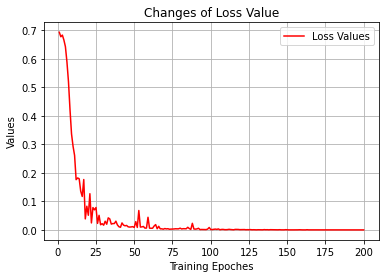

In [26]:
Loss_Value = np.load('Loss_11_dnnL_end_2.npy')
times = np.load('Times_11_dnnL_end_2.npy')

plt.plot(times,Loss_Value,label = 'Loss Values',color = 'r')

#plt.plot(times,Acc_train_L,label = 'Train Accuracy with GDELoss')
#plt.plot(times,Acc_test_L, label = 'Validation Accuracy with GDELoss')
plt.grid()
plt.legend()
plt.title('Changes of Loss Value')
plt.xlabel('Training Epoches')
plt.ylabel('Values')
plt.savefig('Loss MLP.tif', dpi = 400)
plt.show()

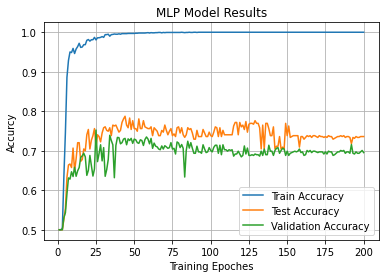

In [22]:
Acc_train_L = np.load('Acc_train_11_best_2.npy')
Acc_test_L = np.load('Acc_test_11_best_2.npy')
Acc_val_L = np.load('Acc_val_11_best_2.npy')
#Loss_Value = np.load('Loss_11_dnnL_end_2.npy')
times = np.load('Times_11_dnnL_end_2.npy')


plt.plot(times,Acc_train_L,label = 'Train Accuracy')
plt.plot(times,Acc_test_L,label = 'Test Accuracy')
plt.plot(times,Acc_val_L,label = 'Validation Accuracy')
#plt.plot(times,Loss_Value,label = 'Loss Value')


#plt.plot(times,Acc_train_L,label = 'Train Accuracy with GDELoss')
#plt.plot(times,Acc_test_L, label = 'Validation Accuracy with GDELoss')
plt.grid()
plt.legend()
plt.title('MLP Model Results')
plt.xlabel('Training Epoches')
plt.ylabel('Accurcy')
plt.savefig('ACC_Compare_2.tif', dpi = 400)
plt.show()

In [43]:
i =2
inc = np.load('Acc_val_33_sf_{}'.format(i)+'.npy')
print(inc)

0.7142857142857143


In [39]:
dnn_acc = []
dnn_inc = []
dnn_non = []


for i in range(10):
    acc = np.load('Acc_val_55_best_{}'.format(i)+'.npy')
    inc = np.load('Acc_val_55_sf_{}'.format(i)+'.npy')
    non = np.load('Acc_val_55_hf_{}'.format(i)+'.npy')
    
    
    dnn_acc.append(acc[-1])
    dnn_inc.append(inc)
    dnn_non.append(non)
        

In [447]:
'''
print(val_list.index(max(val_list)))
rnn = torch.load('dnnL_5_best_{}'.format(val_list.index(max(val_list)))+'.pkl')

health_data_out, last_layer = rnn(health_data)
pred_health = torch.max(health_data_out, 1)[1].data.squeeze()
pred_health = (pred_health.tolist().count(0))/float(health_data.size(0))
sick_data_out, last_layer = rnn(sick_data)
pred_sick = torch.max(sick_data_out, 1)[1].data.squeeze()
pred_sick = (pred_sick.tolist().count(1))/float(sick_data.size(0))
predict_acc = (pred_health+pred_sick)/2 
print(predict_acc,pred_sick,pred_health)
'''

"\nprint(val_list.index(max(val_list)))\nrnn = torch.load('dnnL_5_best_{}'.format(val_list.index(max(val_list)))+'.pkl')\n\nhealth_data_out, last_layer = rnn(health_data)\npred_health = torch.max(health_data_out, 1)[1].data.squeeze()\npred_health = (pred_health.tolist().count(0))/float(health_data.size(0))\nsick_data_out, last_layer = rnn(sick_data)\npred_sick = torch.max(sick_data_out, 1)[1].data.squeeze()\npred_sick = (pred_sick.tolist().count(1))/float(sick_data.size(0))\npredict_acc = (pred_health+pred_sick)/2 \nprint(predict_acc,pred_sick,pred_health)\n"

In [177]:
dnn_acc = []
dnn_sick = []
dnn_health = []

dnnL_acc = []
dnnL_sick = []
dnnL_health = []


for i in range(10):
    rnn = torch.load('dnnL_77_best_{}'.format(i)+'.pkl')
    
    health_data_out, last_layer = rnn(health_data)
    pred_health = torch.max(health_data_out, 1)[1].data.squeeze()
    pred_health = (pred_health.tolist().count(0))/float(health_data.size(0))
    sick_data_out, last_layer = rnn(sick_data)
    pred_sick = torch.max(sick_data_out, 1)[1].data.squeeze()
    pred_sick = (pred_sick.tolist().count(1))/float(sick_data.size(0))
    predict_acc = (pred_health+pred_sick)/2 
    
    dnn_acc.append(predict_acc)
    dnn_sick.append(pred_sick)
    dnn_health.append(pred_health)
    
    print(predict_acc,pred_sick,pred_health)
    
    
for i in range(10):
    rnn = torch.load('dnnL_77_best_{}'.format(i)+'.pkl')
    
    health_data_out, last_layer = rnn(health_data)
    pred_health = torch.max(health_data_out, 1)[1].data.squeeze()
    pred_health = (pred_health.tolist().count(0))/float(health_data.size(0))
    sick_data_out, last_layer = rnn(sick_data)
    pred_sick = torch.max(sick_data_out, 1)[1].data.squeeze()
    pred_sick = (pred_sick.tolist().count(1))/float(sick_data.size(0))
    predict_acc = (pred_health+pred_sick)/2 
    
    dnnL_acc.append(predict_acc)
    dnnL_sick.append(pred_sick)
    dnnL_health.append(pred_health)
    
    print(predict_acc,pred_sick,pred_health)
    

0.7435545385202136 0.6842105263157895 0.8028985507246377
0.6440884820747521 0.47368421052631576 0.8144927536231884
0.720137299771167 0.631578947368421 0.808695652173913
0.6646071700991609 0.5263157894736842 0.8028985507246377
0.7452326468344774 0.7368421052631579 0.7536231884057971
0.7054157131960336 0.5789473684210527 0.8318840579710145
0.6382913806254767 0.47368421052631576 0.8028985507246377
0.6633867276887873 0.5789473684210527 0.7478260869565218
0.6894736842105263 0.5789473684210527 0.8
0.7539282990083905 0.7368421052631579 0.7710144927536232
0.7145690312738368 0.6842105263157895 0.744927536231884
0.7157894736842105 0.631578947368421 0.8
0.7379862700228832 0.7368421052631579 0.7391304347826086
0.7278413424866514 0.7368421052631579 0.7188405797101449
0.7058733790999236 0.6842105263157895 0.7275362318840579
0.6708619374523265 0.631578947368421 0.7101449275362319
0.7775743707093821 0.8421052631578947 0.7130434782608696
0.6382913806254767 0.47368421052631576 0.8028985507246377
0.66460

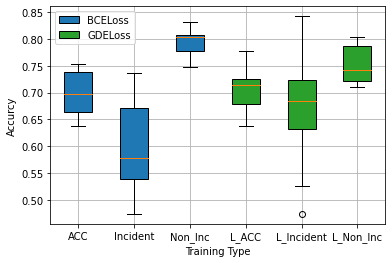

In [178]:
fig, ax = plt.subplots()

bp1 = ax.boxplot(dnn_acc,positions=[1], labels = ['ACC'],widths=0.5, 
                 patch_artist=True, boxprops=dict(facecolor="C0"))
bp1 = ax.boxplot(dnn_sick,positions=[2], labels = ['Incident'],widths=0.5, 
                 patch_artist=True, boxprops=dict(facecolor="C0"))
bp1 = ax.boxplot(dnn_health,positions=[3], labels = ['Non_Inc'],widths=0.5, 
                 patch_artist=True, boxprops=dict(facecolor="C0"))

bp2 = ax.boxplot(dnnL_acc, positions=[4],labels = ['L_ACC'],widths=0.5, 
                 patch_artist=True, boxprops=dict(facecolor="C2"))
bp2 = ax.boxplot(dnnL_sick, positions=[5],labels = ['L_Incident'],widths=0.5, 
                 patch_artist=True, boxprops=dict(facecolor="C2"))
bp2 = ax.boxplot(dnnL_health, positions=[6],labels = ['L_Non_Inc'],widths=0.5, 
                 patch_artist=True, boxprops=dict(facecolor="C2"))

plt.legend(handles=[bp1["boxes"][0],bp2["boxes"][0]],labels=['BCELoss','GDELoss'])
plt.xlabel('Training Type')
plt.ylabel('Accurcy') 
plt.grid()
plt.savefig('ACC_Compare_Loss_2.tif', dpi = 400)
plt.show()


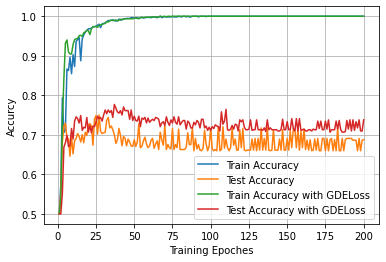

In [531]:
Acc_train = np.load('Acc_train_66_best_7.npy')
Acc_test = np.load('Acc_test_66_best_7.npy')

Acc_train_L = np.load('Acc_train_77_best_7.npy')
Acc_test_L = np.load('Acc_test_77_best_7.npy')
times = np.load('Times_dnnL_end_11.npy')


plt.plot(times,Acc_train,label = 'Train Accuracy')
plt.plot(times,Acc_test,label = 'Test Accuracy')
plt.plot(times,Acc_train_L,label = 'Train Accuracy with GDELoss')
plt.plot(times,Acc_test_L, label = 'Test Accuracy with GDELoss')
plt.grid()
plt.legend()
plt.xlabel('Training Epoches')
plt.ylabel('Accurcy')
plt.savefig('ACC_Compare_2.tif', dpi = 400)
plt.show()

In [36]:
rnn = torch.load('dnnL_5_best_1.pkl')
Loss_dnn = np.load('Loss_dnnL_end_11.npy')
times = np.load('Times_dnnL_end_11.npy')

TypeError: len() takes exactly one argument (0 given)

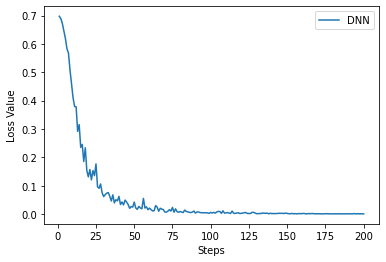

In [46]:
plt.plot(times,Loss_CNN)
plt.xlabel('Steps')
plt.ylabel('Loss Value')
plt.legend(['DNN'])
plt.savefig('DNN_loss.tif', dpi = 400)
plt.show()
#np.save('Loss_encoder.npy', Loss_encoder)

In [497]:
dnn_acc = []
dnn_sick = []
dnn_health = []




In [498]:
for i in range(10):
    rnn = torch.load('dnnL_11_best_{}'.format(i)+'.pkl')
    
    health_data_out, last_layer = rnn(health_data)
    pred_health = torch.max(health_data_out, 1)[1].data.squeeze()
    pred_health = (pred_health.tolist().count(0))/float(health_data.size(0))
    sick_data_out, last_layer = rnn(sick_data)
    pred_sick = torch.max(sick_data_out, 1)[1].data.squeeze()
    pred_sick = (pred_sick.tolist().count(1))/float(sick_data.size(0))
    predict_acc = (pred_health+pred_sick)/2 
    
    dnn_acc.append(predict_acc)
    dnn_sick.append(pred_sick)
    dnn_health.append(pred_health)
    
    print(predict_acc,pred_sick,pred_health)
    
    


0.7553775743707094 0.7368421052631579 0.7739130434782608
0.7785659801678109 0.7368421052631579 0.8202898550724638
0.7829138062547674 0.7368421052631579 0.8289855072463768
0.7744469870327995 0.7894736842105263 0.7594202898550725
0.7742181540808544 0.7368421052631579 0.8115942028985508
0.7655225019069413 0.7368421052631579 0.7942028985507247
0.7611746758199847 0.7368421052631579 0.7855072463768116
0.8063310450038139 0.7894736842105263 0.8231884057971014
0.7800152555301296 0.7368421052631579 0.8231884057971014
0.7568268497330282 0.7368421052631579 0.7768115942028986


In [466]:
    
np.save('dnnL_34_predict_acc.npy',dnn_acc )
np.save('dnnL_34_predict_sick.npy',dnn_sick )
np.save('dnnL_34_predict_health.npy',dnn_health )

print(len(dnn_acc))

10


In [512]:
dnn_acc = []
dnn_sick = []
dnn_health = []



In [ ]:
dnn_acc_34 = np.load('dnnL_34_predict_acc.npy')
dnn_sick_34 = np.load('dnnL_34_predict_acc.npy')
dnn_health_34 = np.load('dnnL_34_predict_acc.npy')

dnn_acc.append(dnn_acc_34)
dnn_sick.append(dnn_sick_34)
dnn_health.append(dnn_health_34)



ValueError: Dimensions of labels and X must be compatible

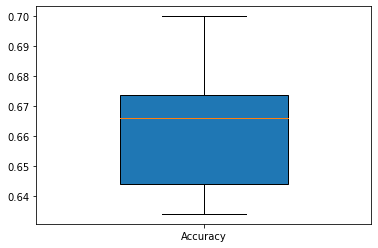

In [40]:
fig, ax = plt.subplots()

bp5 = ax.boxplot(dnn_acc, positions=[1],labels = ['Accuracy'],widths=0.5, 
                 patch_artist=True, boxprops=dict(facecolor="C0"))
bp5 = ax.boxplot(dnn_inc, positions=[2],labels = ['Incident'],widths=0.5, 
                 patch_artist=True, boxprops=dict(facecolor="C0"))
bp5 = ax.boxplot(dnn_non, positions=[3],labels = ['Non-incident'],widths=0.5, 
                 patch_artist=True, boxprops=dict(facecolor="C0"))


plt.grid()
plt.xlabel('Training Type')
plt.ylabel('Accurcy') 
#plt.savefig('ACC_Compare_GDELoss.tif', dpi = 400)
plt.show()



In [660]:
len(b_y)/len(y_train)*((b_y == 1).sum()/len(b_y))


(b_y == 1).sum()/len(y_train)

tensor(0.0383)

In [453]:
dnn_acc=[]
dnn_sick = []
dnn_health = []

dnn_acc_ori = []
dnn_sick_ori = []
dnn_health_ori = []

for i in range(1,6):
    dnn_acc.append(np.load('Acc_testreal_dnn_60120100_{}.npy'.format(i)).tolist()[-1])
    dnn_sick.append(np.load('pred_sick_dnn_60120100_{}.npy'.format(i)).tolist()[-1])
    dnn_health.append(np.load('pred_health_dnn_60120100_{}.npy'.format(i)).tolist()[-1])
    
for i in range(1,6):   
    dnn_acc_ori.append(np.load('Acc_testreal_dnn_601200_{}.npy'.format(i)).tolist()[-1])
    dnn_sick_ori.append(np.load('pred_sick_dnn_601200_{}.npy'.format(i)).tolist()[-1])
    dnn_health_ori.append(np.load('pred_health_dnn_601200_{}.npy'.format(i)).tolist()[-1])
    
    

In [454]:
svm_acc = np.load('SVM_Acc.npy')
svm_recall = np.load('SVM_Inc.npy')
svm_nr = np.load('SVM_Non.npy')

dt_acc = np.load('DT_Acc.npy')
dt_recall = np.load('DT_Inc.npy')
dt_nr = np.load('DT_Non.npy')

rf_acc = np.load('RF_Acc.npy')
rf_recall = np.load('RF_Inc.npy')
rf_nr = np.load('RF_Non.npy')

svm_acc = np.load('SVM_Acc.npy')
svm_recall = np.load('SVM_Inc.npy')
svm_nr = np.load('SVM_Non.npy')

dt_acc = np.load('DT_Acc.npy')
dt_recall = np.load('DT_Inc.npy')
dt_nr = np.load('DT_Non.npy')

rf_acc = np.load('RF_Acc.npy')
rf_recall = np.load('RF_Inc.npy')
rf_nr = np.load('RF_Non.npy')

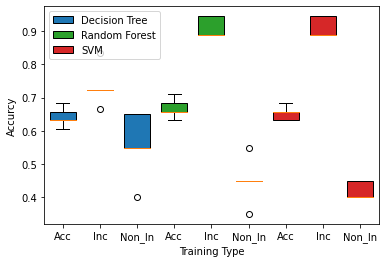

In [461]:
fig, ax = plt.subplots()

bp1 = ax.boxplot(dt_acc,positions=[1], labels = ['Acc'],widths=0.7, 
                 patch_artist=True, boxprops=dict(facecolor="C0"))
bp1 = ax.boxplot(dt_recall,positions=[2], labels = ['Inc'],widths=0.7, 
                 patch_artist=True, boxprops=dict(facecolor="C0"))
bp1 = ax.boxplot(dt_nr,positions=[3], labels = ['Non_In'],widths=0.7, 
                 patch_artist=True, boxprops=dict(facecolor="C0"))

bp2 = ax.boxplot(rf_acc, positions=[4],labels = ['Acc'],widths=0.7, 
                 patch_artist=True, boxprops=dict(facecolor="C2"))
bp2 = ax.boxplot(rf_recall, positions=[5],labels = ['Inc'],widths=0.7, 
                 patch_artist=True, boxprops=dict(facecolor="C2"))
bp2 = ax.boxplot(rf_nr, positions=[6],labels = ['Non_In'],widths=0.7, 
                 patch_artist=True, boxprops=dict(facecolor="C2"))

bp3 = ax.boxplot(svm_acc, positions=[7],labels = ['Acc'],widths=0.7, 
                 patch_artist=True, boxprops=dict(facecolor="C3"))
bp3 = ax.boxplot(svm_recall, positions=[8],labels = ['Inc'],widths=0.7, 
                 patch_artist=True, boxprops=dict(facecolor="C3"))
bp3 = ax.boxplot(svm_nr, positions=[9],labels = ['Non_In'],widths=0.7, 
                 patch_artist=True, boxprops=dict(facecolor="C3"))

#ax.legend([bp1['boxes'][0],bp2['boxes'][0],bp3['boxes'][0]],['A=60Inc-60NonInc ','B=60Inc-120Gen-200NonInc','C=60Inc-200NonInc'])




plt.legend(handles=[bp1["boxes"][0],bp2["boxes"][0],bp3["boxes"][0]],labels=['Decision Tree','Random Forest','SVM'])

plt.xlabel('Training Type')
plt.ylabel('Accurcy') 
plt.savefig('ACC_Compare_machine_learning.tif', dpi = 400)
plt.show()

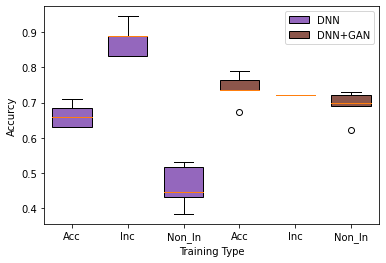

In [462]:
fig, ax = plt.subplots()

bp4 = ax.boxplot(dnn_acc_ori, positions=[10],labels = ['Acc'],widths=0.7, 
                 patch_artist=True, boxprops=dict(facecolor="C4"))
bp4 = ax.boxplot(dnn_sick_ori, positions=[11],labels = ['Inc'],widths=0.7, 
                 patch_artist=True, boxprops=dict(facecolor="C4"))
bp4 = ax.boxplot(dnn_health_ori, positions=[12],labels = ['Non_In'],widths=0.7, 
                 patch_artist=True, boxprops=dict(facecolor="C4"))

bp5 = ax.boxplot(dnn_acc, positions=[13],labels = ['Acc'],widths=0.7, 
                 patch_artist=True, boxprops=dict(facecolor="C5"))
bp5 = ax.boxplot(dnn_sick, positions=[14],labels = ['Inc'],widths=0.7, 
                 patch_artist=True, boxprops=dict(facecolor="C5"))
bp5 = ax.boxplot(dnn_health, positions=[15],labels = ['Non_In'],widths=0.7, 
                 patch_artist=True, boxprops=dict(facecolor="C5"))



plt.legend(handles=[bp4["boxes"][0],bp5["boxes"][0]],labels=['DNN','DNN+GAN'])

plt.xlabel('Training Type')
plt.ylabel('Accurcy') 
plt.savefig('ACC_Compare_deep learning.tif', dpi = 400)
plt.show()





In [65]:
dnn_acc_nl = []
dnn_sick_nl = []
dnn_health_nl = []
dnn_acc_l = []
dnn_sick_l = []
dnn_health_l = []

for i in range(1,11):   
    dnn_acc_nl.append(np.load('Acc_testreal_dnn_best_{}.npy'.format(i)).tolist())
    dnn_sick_nl.append(np.load('pred_sick_dnn_best_{}.npy'.format(i)).tolist()[-1])
    dnn_health_nl.append(np.load('pred_health_dnn_best_{}.npy'.format(i)).tolist()[-1])
    
    dnn_acc_l.append(np.load('Acc_testreal_dnnL_best_{}.npy'.format(i)).tolist())
    dnn_sick_l.append(np.load('pred_sick_dnnL_best_{}.npy'.format(i)).tolist()[-1])
    dnn_health_l.append(np.load('pred_health_dnnL_best_{}.npy'.format(i)).tolist()[-1])
    

In [67]:
a = np.load('pred_sick_dnn_best_1.npy')[-1]
a
dnn_acc_l


[0.8723684210526316,
 0.7758771929824562,
 0.7609649122807017,
 0.8096491228070175,
 0.8210526315789474,
 0.743421052631579,
 0.8223684210526316,
 0.7723684210526316,
 0.7904426764585883,
 0.7975061199510404]

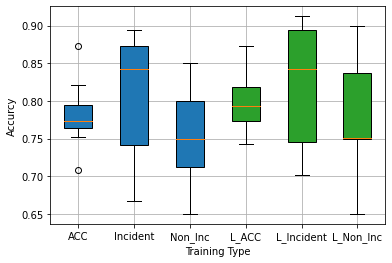

In [68]:
fig, ax = plt.subplots()

bp1 = ax.boxplot(dnn_acc_nl,positions=[1], labels = ['ACC'],widths=0.5, 
                 patch_artist=True, boxprops=dict(facecolor="C0"))
bp1 = ax.boxplot(dnn_sick_nl,positions=[2], labels = ['Incident'],widths=0.5, 
                 patch_artist=True, boxprops=dict(facecolor="C0"))
bp1 = ax.boxplot(dnn_health_nl,positions=[3], labels = ['Non_Inc'],widths=0.5, 
                 patch_artist=True, boxprops=dict(facecolor="C0"))

bp2 = ax.boxplot(dnn_acc_l, positions=[4],labels = ['L_ACC'],widths=0.5, 
                 patch_artist=True, boxprops=dict(facecolor="C2"))
bp2 = ax.boxplot(dnn_sick_l, positions=[5],labels = ['L_Incident'],widths=0.5, 
                 patch_artist=True, boxprops=dict(facecolor="C2"))
bp2 = ax.boxplot(dnn_health_l, positions=[6],labels = ['L_Non_Inc'],widths=0.5, 
                 patch_artist=True, boxprops=dict(facecolor="C2"))


plt.xlabel('Training Type')
plt.ylabel('Accurcy') 
plt.grid()
plt.savefig('ACC_Compare_Loss.tif', dpi = 400)
plt.show()



In [121]:
recall_data = sick_data + health_data

RuntimeError: The size of tensor a (57) must match the size of tensor b (344) at non-singleton dimension 0

In [28]:

rnn = torch.load('dnnL_11_best_0.pkl')
test_output, last_layer = rnn(x_val)                   # (samples, time_step, input_size)
guess = torch.max(test_output, 1)[1].data.squeeze()


In [29]:
print(len(x_test))

295


0.6962025316455697 0.7716207559256887


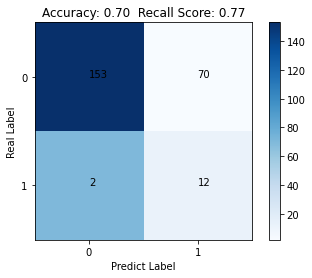

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt


# 预测数据，predict之后的预测结果集
#guess = guess.numpy()
# 真实结果集
fact = y_val.numpy()
# 类别
classes = list(set(fact))
# 排序，准确对上分类结果
classes.sort()
# 对比，得到混淆矩阵
confusion = confusion_matrix(guess, fact)

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
print(accuracy_score(fact,guess),recall_score(fact, guess,average='macro'))


acc = float(accuracy_score(fact,guess))
recall = float(recall_score(fact, guess,average='macro'))


# 热度图，后面是指定的颜色块，gray也可以，gray_x反色也可以
plt.imshow(confusion, cmap=plt.cm.Blues)
# 这个东西就要注意了
# ticks 这个是坐标轴上的坐标点
# label 这个是坐标轴的注释说明
indices = range(len(confusion))
# 坐标位置放入
# 第一个是迭代对象，表示坐标的顺序
# 第二个是坐标显示的数值的数组，第一个表示的其实就是坐标显示数字数组的index，但是记住必须是迭代对象
plt.xticks(indices, classes)
plt.yticks(indices, classes)
# 热度显示仪？就是旁边的那个验孕棒啦
plt.colorbar()
# 就是坐标轴含义说明了
plt.xlabel('Predict Label')
plt.ylabel('Real Label')
plt.title('Accuracy: 0.70  Recall Score: 0.77')
# 显示数据，直观些
for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index])
#plt.savefig('Confusion_results.tif', dpi = 400)
plt.show()


In [2]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr, tpr, thersholds = roc_curve(y_label, y_score, pos_label=1)

In [20]:
rnn = torch.load('dnnL_11_best_0.pkl')
#rnn = torch.load('dnnL_11_best_2.pkl')
test_output, last_layer = rnn(x_val)                 # (samples, time_step, input_size)
guess = torch.max(test_output, 1)[1].data.squeeze()


假阳率	真阳率	阈值
0.000000 0.000000 2.000000
0.313901 0.857143 1.000000
1.000000 1.000000 0.000000
----------------------


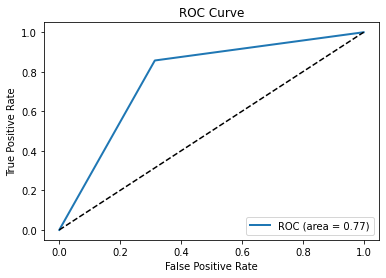

In [27]:
fpr, tpr, thersholds = roc_curve(y_val, guess, pos_label=1)
print('假阳率\t真阳率\t阈值')
for i, value in enumerate(thersholds):
    print("%f %f %f" % (fpr[i], tpr[i], value))
print('----------------------')

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([-0.05, 1.05])  
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.savefig('ROC Curve.tif', dpi = 400)
plt.show()